In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df = pd.read_csv(r"C:\Users\ASUS\Desktop\Q HARDWARE\NMR\dati oscilloscopio\24.2967.csv")


In [2]:
#loading data times-voltages
x = df['Record Length'][11:]
y = df['Analog:100000'][11:]

#pruning 
prune = 1

if prune:
    x1=x.iloc[::prune]
    y1=y.iloc[::prune]
print(x1.shape, y1.shape)

#conversion to numeric
x1 = pd.to_numeric(x1)
y1 = pd.to_numeric(y1)


(100000,) (100000,)


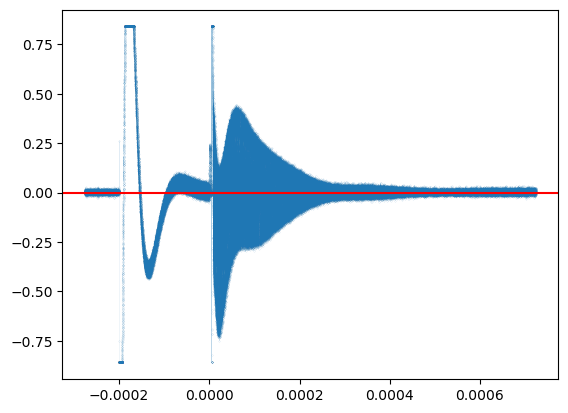

In [3]:
#plotting
plt.plot(x1,y1,'-o', linewidth=0.05, markersize=0.05)
plt.axhline(y=0, color='r', linestyle='-' )


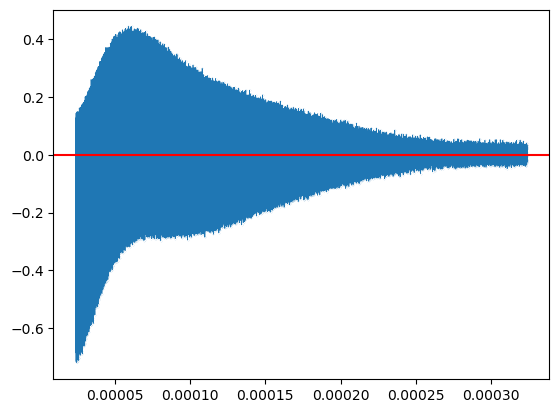

In [15]:
#ZOOOM plotting 
start = 30000
stop = 60000

plt.plot(x1[start:stop],y1[start:stop],'-o', linewidth=0.5, markersize=0.05)
plt.axhline(y=0, color='r', linestyle='-' )

In [16]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

# Create a scatter plot
p = figure()

# Add scatter glyphs
p.scatter(x1[start:stop],y1[start:stop])

# Add hover tool with cursor coordinates
hover = HoverTool(tooltips=[('x', '@x'), ('y', '@y')])
p.add_tools(hover)

# Show plot
show(p)

In [18]:
#sampled points from the exponential decay
x_fit = np.array([6.707E-05,7.851E-05,8.962E-05,1.029E-04,1.148E-04,1.244E-04,1.362E-04,1.435E-04])
y_fit = np.array([0.432,0.393,0.345,0.300,0.265,0.238,0.220,0.205])

df_fit = pd.DataFrame({'time':x_fit, 'voltage': y_fit})
df_fit

,time,voltage
0,0.000067,0.432
1,0.000079,0.393
2,0.000090,0.345
3,0.000103,0.300
4,0.000115,0.265
5,0.000124,0.238
6,0.000136,0.220
7,0.000143,0.205


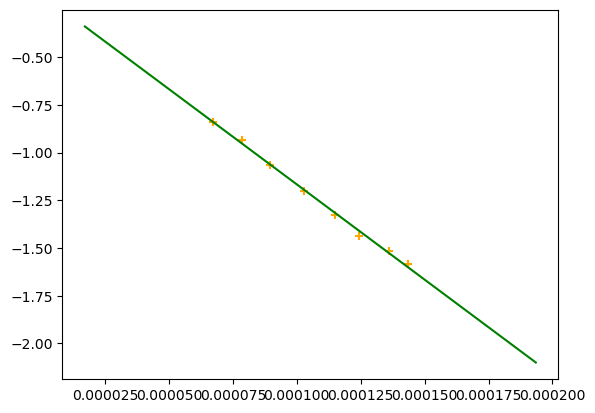

In [19]:
from scipy.stats import linregress

#linearizing data
y_lin = np.log(y_fit)

slope, intercept, r_value, p_value, std_err = linregress(x_fit, y_lin)

plt.scatter(x_fit, y_lin, marker='+', color="orange")
plt.errorbar(x_fit, y_lin, yerr=(1/y)*(0.2/(10*np.sqrt(6))), marker='+', color="red", fmt=".")

X=np.linspace(min(x_fit)-0.00005, max(x_fit)+0.00005, 10)
plt.plot(X, intercept + slope*X, color="green")


In [33]:
from scipy.optimize import curve_fit

yerr=(1/y_fit)*(0.2/(10*np.sqrt(6)))
popt, pcov = curve_fit(lambda x,m,q: m*x+q ,x_fit, y_lin, sigma=yerr, absolute_sigma=True)

slope,q = popt
sigma_slope, sigma_q = np.sqrt(np.diag(pcov))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25648\86202692.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.errorbar(x_fit, y_lin, yerr=yerr, marker='+', color="red", fmt=".")


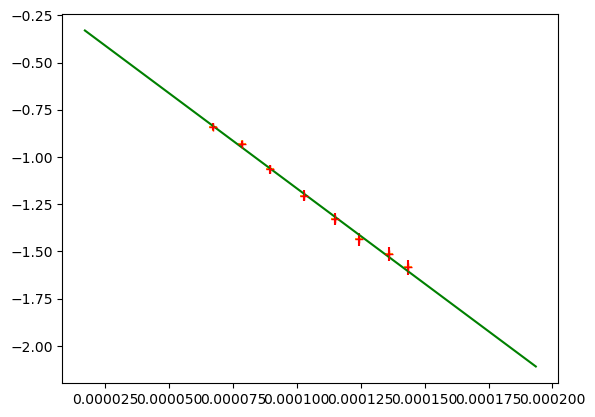

In [36]:
plt.scatter(x_fit, y_lin, marker='+', color="orange")
plt.errorbar(x_fit, y_lin, yerr=yerr, marker='+', color="red", fmt=".")
X=np.linspace(min(x_fit)-0.00005, max(x_fit)+0.00005, 10)
plt.plot(X, q + slope*X, color="green")

In [39]:
T2_star = -1/slope
err = (1/(slope**2))*sigma_slope
print("T2*: ", T2_star*10**6,  "+- ", err*10**6, "us")
#valore trovato nella fft: 0.15 ms (150 us)


T2*:  99.20850976031566 +-  3.772944998213531 us
